In [106]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
from datetime import datetime 

In [107]:
#import the request library.
import requests

#Import the API Key.
from config import weather_api_key

In [108]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [109]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90,high = 90,size=1500)
lngs = np.random.uniform(low = -90,high = 90,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [110]:
coordinates = list(lat_lngs)

In [111]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [112]:
# #Create an empty list to hold weather data.
# city_data = []
# #Print the beginning of the logging.
# print("Beginning Data Retrieval    ")
# print("----------------------------")

# #Create counters.
# record_count = 1
# set_count = 1

In [113]:
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [114]:
# #Loop through all the cities in the list.
# for i, city in enumerate(cities):
    
#     #Group cities in sets of 50 for logging purposes.
#     if (i %50 -- 0 and i <-50):
#         set_count += 1
#         record_count = 1
#     #create endpoint URL with each city.
#     city_url = url + "&q="+ city.replace(" ","+")
    
#     #Log the url, record and set numbers and the city.
#     print(f"Processing Record{record_count} of the Set {set_count} | {city}")
#     #Add 1 to the record count.
#     record_count += 1

In [115]:
#Create an empty list to hold weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i %50 -- 0 and i <-50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city.
    city_url = url + "&q="+ city.replace(" ","+")
    
    #Log the url, record and set numbers and the city.
    print(f"Processing Record{record_count} of the Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record1 of the Set 1 | upata
Processing Record2 of the Set 1 | kruisfontein
Processing Record3 of the Set 1 | torbay
Processing Record4 of the Set 1 | upernavik
Processing Record5 of the Set 1 | vila franca do campo
Processing Record6 of the Set 1 | podgorodnyaya pokrovka
Processing Record7 of the Set 1 | port elizabeth
Processing Record8 of the Set 1 | cape town
Processing Record9 of the Set 1 | ushuaia
Processing Record10 of the Set 1 | natal
Processing Record11 of the Set 1 | busselton
Processing Record12 of the Set 1 | bredasdorp
Processing Record13 of the Set 1 | roald
Processing Record14 of the Set 1 | tsihombe
City not found. Skipping...
Processing Record15 of the Set 1 | ajdabiya
Processing Record16 of the Set 1 | vetlanda
Processing Record17 of the Set 1 | arnissa
Processing Record18 of the Set 1 | praia da vitoria
Processing Record19 of the Set 1 | huarmey
Processing Record20 of the Set 1 | vila velha
Proces

Processing Record171 of the Set 1 | klaksvik
Processing Record172 of the Set 1 | karkaralinsk
City not found. Skipping...
Processing Record173 of the Set 1 | vestmannaeyjar
Processing Record174 of the Set 1 | iranshahr
Processing Record175 of the Set 1 | corn island
Processing Record176 of the Set 1 | warmbad
Processing Record177 of the Set 1 | loknya
Processing Record178 of the Set 1 | tahoua
Processing Record179 of the Set 1 | hobyo
Processing Record180 of the Set 1 | grand gaube
Processing Record181 of the Set 1 | morshansk
Processing Record182 of the Set 1 | ringebu
Processing Record183 of the Set 1 | rodrigues alves
Processing Record184 of the Set 1 | komsomolets
Processing Record185 of the Set 1 | sucre
Processing Record186 of the Set 1 | sao joao da barra
Processing Record187 of the Set 1 | harnosand
Processing Record188 of the Set 1 | dovolnoye
Processing Record189 of the Set 1 | maunabo
Processing Record190 of the Set 1 | lohardaga
Processing Record191 of the Set 1 | san borja

Processing Record344 of the Set 1 | lagoa
Processing Record345 of the Set 1 | sinnamary
Processing Record346 of the Set 1 | seydi
Processing Record347 of the Set 1 | corinth
Processing Record348 of the Set 1 | shamary
Processing Record349 of the Set 1 | zyryanskoye
Processing Record350 of the Set 1 | lasa
Processing Record351 of the Set 1 | wajir
Processing Record352 of the Set 1 | tucuman
Processing Record353 of the Set 1 | opuwo
Processing Record354 of the Set 1 | kralendijk
Processing Record355 of the Set 1 | grand-santi
Processing Record356 of the Set 1 | bonthe
Processing Record357 of the Set 1 | zalesovo
Processing Record358 of the Set 1 | ambam
Processing Record359 of the Set 1 | severo-zadonsk
Processing Record360 of the Set 1 | san miguel
Processing Record361 of the Set 1 | gloucester
Processing Record362 of the Set 1 | hunsur
Processing Record363 of the Set 1 | salekhard
Processing Record364 of the Set 1 | san andres
Processing Record365 of the Set 1 | saldanha
Processing Rec

Processing Record518 of the Set 1 | prijepolje
Processing Record519 of the Set 1 | goirle
Processing Record520 of the Set 1 | lesnoye
Processing Record521 of the Set 1 | lillesand
Processing Record522 of the Set 1 | springfield
Processing Record523 of the Set 1 | saint-georges
Processing Record524 of the Set 1 | kattivakkam
Processing Record525 of the Set 1 | viedma
Processing Record526 of the Set 1 | motupe
Processing Record527 of the Set 1 | lodja
Processing Record528 of the Set 1 | sao paulo de olivenca
Processing Record529 of the Set 1 | oktyabrskoye
Processing Record530 of the Set 1 | giurgita
Processing Record531 of the Set 1 | inzer
Processing Record532 of the Set 1 | tashtyp
Processing Record533 of the Set 1 | havre-saint-pierre
Processing Record534 of the Set 1 | bubaque
Processing Record535 of the Set 1 | mudgal
Processing Record536 of the Set 1 | macas
Processing Record537 of the Set 1 | sadiqabad
Processing Record538 of the Set 1 | sao joao do piaui
Processing Record539 of 

In [116]:
len(city_data)

570

In [117]:
#Convert array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upata,8.0086,-62.3989,89.01,56,76,5.01,VE,2021-03-18 20:59:30
1,Kruisfontein,-34.0033,24.7314,72.00,73,21,4.00,ZA,2021-03-18 20:59:30
2,Torbay,47.6666,-52.7314,35.60,69,75,18.41,CA,2021-03-18 20:59:30
3,Upernavik,72.7868,-56.1549,-8.27,96,87,7.40,GL,2021-03-18 20:58:00
4,Vila Franca Do Campo,37.7167,-25.4333,59.00,72,20,10.36,PT,2021-03-18 20:58:56
...,...,...,...,...,...,...,...,...,...
565,Ballina,-28.8667,153.5667,68.00,100,90,10.36,AU,2021-03-18 21:01:54
566,Santa Vitoria,-18.8386,-50.1214,80.15,69,86,5.08,BR,2021-03-18 21:01:54
567,Port-Cartier,50.0334,-66.8654,32.00,86,75,14.97,CA,2021-03-18 21:01:54
568,Terrace Bay,48.7834,-87.1000,35.60,25,1,9.22,CA,2021-03-18 21:01:54


In [118]:
#Reorder the columns 
new_column_order=["City","Country","Date","Lat","Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upata,VE,2021-03-18 20:59:30,8.0086,-62.3989,89.01,56,76,5.01
1,Kruisfontein,ZA,2021-03-18 20:59:30,-34.0033,24.7314,72.00,73,21,4.00
2,Torbay,CA,2021-03-18 20:59:30,47.6666,-52.7314,35.60,69,75,18.41
3,Upernavik,GL,2021-03-18 20:58:00,72.7868,-56.1549,-8.27,96,87,7.40
4,Vila Franca Do Campo,PT,2021-03-18 20:58:56,37.7167,-25.4333,59.00,72,20,10.36
...,...,...,...,...,...,...,...,...,...
565,Ballina,AU,2021-03-18 21:01:54,-28.8667,153.5667,68.00,100,90,10.36
566,Santa Vitoria,BR,2021-03-18 21:01:54,-18.8386,-50.1214,80.15,69,86,5.08
567,Port-Cartier,CA,2021-03-18 21:01:54,50.0334,-66.8654,32.00,86,75,14.97
568,Terrace Bay,CA,2021-03-18 21:01:54,48.7834,-87.1000,35.60,25,1,9.22


In [119]:
# Create an output csv File.
output_data_file = "weather_data/cities.csv"
#Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [120]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

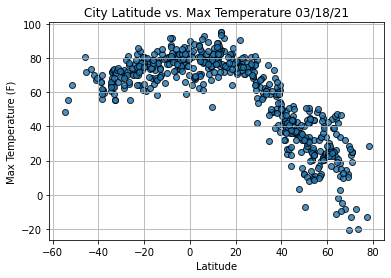

In [122]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()